In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

### NWS Graph

In [2]:
df_NWS = pd.read_csv('./datasets/newman_50_4_0.8_10000_False.csv', index_col='Unnamed: 0')
df_NWS

,kappa,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Concentrated
0,3.427979,182,50,4,11,4,0
1,4.279666,180,50,5,11,4,1
2,0.767030,180,50,5,10,4,0
3,1.288323,179,50,5,10,4,0
4,3.286695,187,50,5,11,4,0
...,...,...,...,...,...,...,...
9995,1.027659,182,50,4,12,4,0
9996,3.613917,178,50,4,11,4,1
9997,3.076541,169,50,4,10,4,0
9998,1.775517,174,50,4,9,4,0


In [26]:
sum(df_NWS['Concentrated'])

1838

In [3]:
X = np.array(df_NWS[['kappa', '# Edges', '# Nodes', 'Min Degree', 'Max Degree', 'Diameter']])
y = np.array(df_NWS['Concentrated'])

#### Over-Sampling:

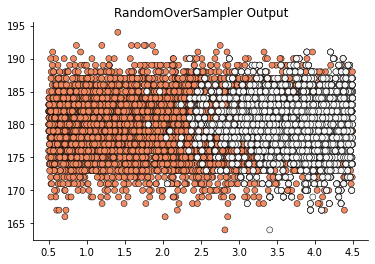

In [4]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output")
pass

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size = 0.25, 
                                                    random_state = 22, 
                                                    stratify = y_resampled)

In [6]:
svc = SVC(kernel = 'poly', C = 3.5, random_state = 0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)

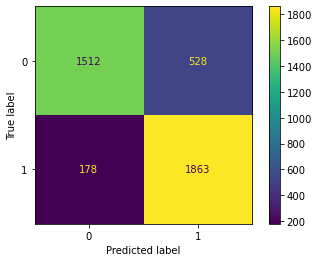

In [7]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=svc.classes_)
disp.plot()
plt.show()

In [8]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.779
Recall: 0.913
F1: 0.841
Accuracy: 0.827


#### Under-Sampling:

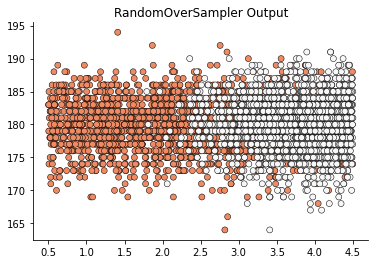

In [9]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output")
pass

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size = 0.25, 
                                                    random_state = 22, 
                                                    stratify = y_resampled)

In [11]:
svc = SVC(kernel = 'poly', C = 3.5, random_state = 0,)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)

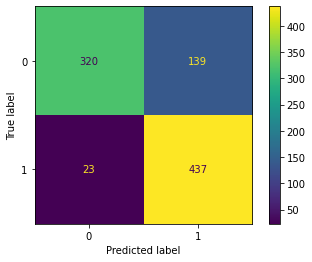

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=svc.classes_)
disp.plot()
plt.show()

In [13]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.759
Recall: 0.950
F1: 0.844
Accuracy: 0.824


### ER Graph

In [14]:
df_ER = pd.read_csv('./datasets/erdosrenyi_False.csv', index_col='Unnamed: 0')
df_ER

,kappa,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Concentrated
0,3.887704,3493,89,70,85,2,0
1,3.256588,517,38,22,32,2,1
2,3.712963,3127,92,58,77,2,0
3,1.491359,2489,88,46,69,2,0
4,1.685228,2189,73,53,67,2,0
...,...,...,...,...,...,...,...
9143,2.545986,966,50,31,46,2,0
9144,1.887804,515,42,19,31,2,0
9145,1.478511,2033,84,35,58,2,0
9146,4.484689,576,89,7,21,3,0


In [15]:
X = np.array(df_ER[['kappa', '# Edges', '# Nodes', 'Min Degree', 'Max Degree', 'Diameter']])
y = np.array(df_ER['Concentrated'])

#### Over-Sampling:

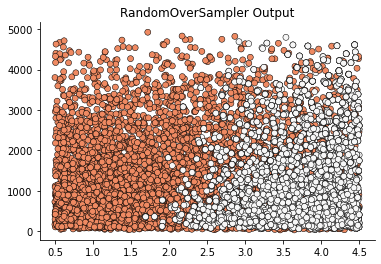

In [16]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output")
pass

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size = 0.25, 
                                                    random_state = 22, 
                                                    stratify = y_resampled)

In [18]:
svc = SVC(kernel = 'poly', C = 5.0, random_state = 0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)

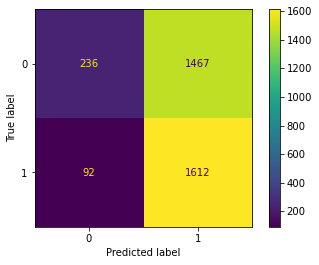

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=svc.classes_)
disp.plot()
plt.show()

In [20]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.524
Recall: 0.946
F1: 0.674
Accuracy: 0.542


#### Under-Sampling:

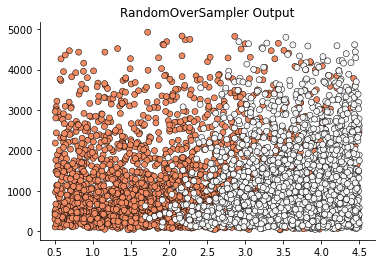

In [21]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output")
pass

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size = 0.25, 
                                                    random_state = 22, 
                                                    stratify = y_resampled)

In [23]:
svc = SVC(kernel = 'poly', C = 3.5, random_state = 0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)

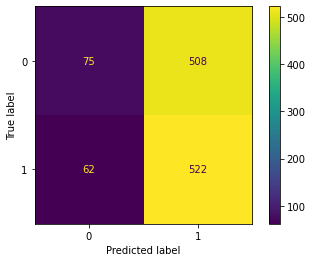

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=svc.classes_)
disp.plot()
plt.show()

In [25]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.507
Recall: 0.894
F1: 0.647
Accuracy: 0.512
